## Seaborn Tutorial 
Follow the Tutorial by https://www.youtube.com/watch?v=6GUZXDef2U0

Seaborn is a data visualization library built on top of Matplotlib. 

It is often used because it makes attractive visualizations and works easily with Pandas. 

While in Matplotlib you often had to write multiple lines of code to create a plot Seaborn makes assumptions on what you want which often translates into getting the same plot with 1 line of code.

TIPS: < use shift + tab to see what is available for you >

### import

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Import Data

In [11]:
# You can import custom data
cs_df = pd.read_csv("/Users/yikaima/Desktop/Python_Jupyter/ComputerSales.csv")
# print(cs_df.head())

# Seaborn provides built in datasets
print(sns.get_dataset_names())

crash_df=sns.load_dataset('car_crashes')
crash_df.head()

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'exercise', 'flights', 'fmri', 'gammas', 'geyser', 'iris', 'mpg', 'penguins', 'planets', 'taxis', 'tips', 'titanic']


,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


### Distribution Plot

Provides a way to look at a univariate distribution. 
A univeriate distribution provides a distribution for one variable

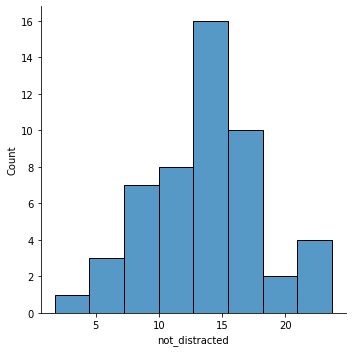

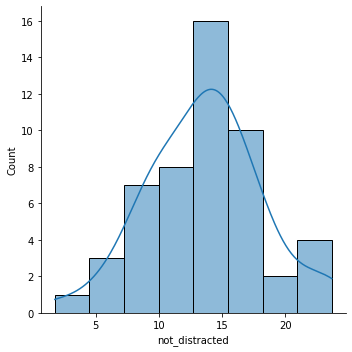

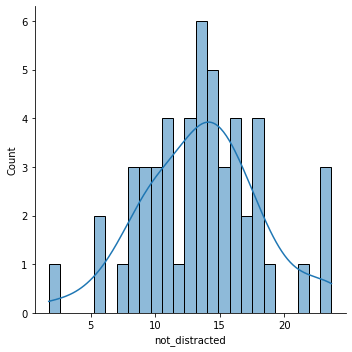

In [15]:
sns.displot(crash_df['not_distracted'])
sns.displot(crash_df['not_distracted'],kde=True)
sns.displot(crash_df['not_distracted'],kde=True,bins=25)

### Joint Plot

Jointplot compares 2 distributions and plots a scatter plot by default

A Jointplot comprises three plots. 

Out of the three, 

a. one plot displays a bivariate graph which shows how the dependent variable(Y) varies with the independent variable(X). 

b. Another plot is placed horizontally at the top of the bivariate graph and it shows the distribution of the independent variable(X). 

c. The third plot is placed on the right margin of the bivariate graph with the orientation set to vertical and it shows the distribution of the dependent variable(Y). 

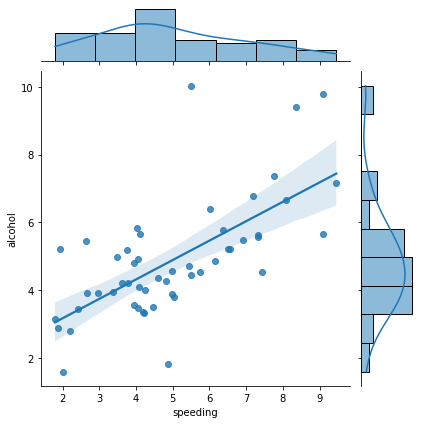

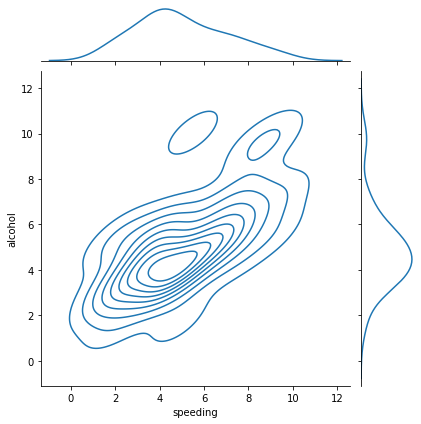

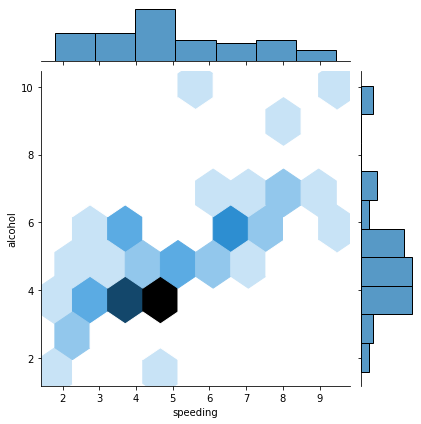

In [21]:
sns.jointplot(x='speeding',y='alcohol',data=crash_df,kind='reg')
sns.jointplot(x='speeding',y='alcohol',data=crash_df,kind='kde') #kde: kernel density estimation. 
                         # KDE Plot described as Kernel Density Estimate is used for visualizing the Probability 
                      # Density of a continuous variable. 
sns.jointplot(x='speeding',y='alcohol',data=crash_df,kind='hex') # hex: Hexagon plot

### KDE plot

<AxesSubplot:xlabel='alcohol', ylabel='Density'>

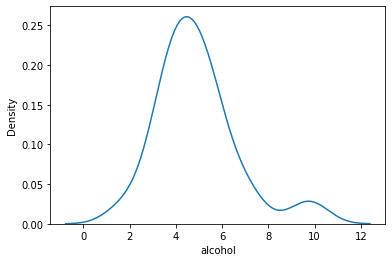

In [23]:
sns.kdeplot(crash_df['alcohol'])

### Pair plot

Pair Plots are a  way to visualize relationships between each variable. 

It produces a matrix of relationships between each variable in your data for an instant examination of our data. It can also be a great jumping off point for determining types of regression analysis to use.

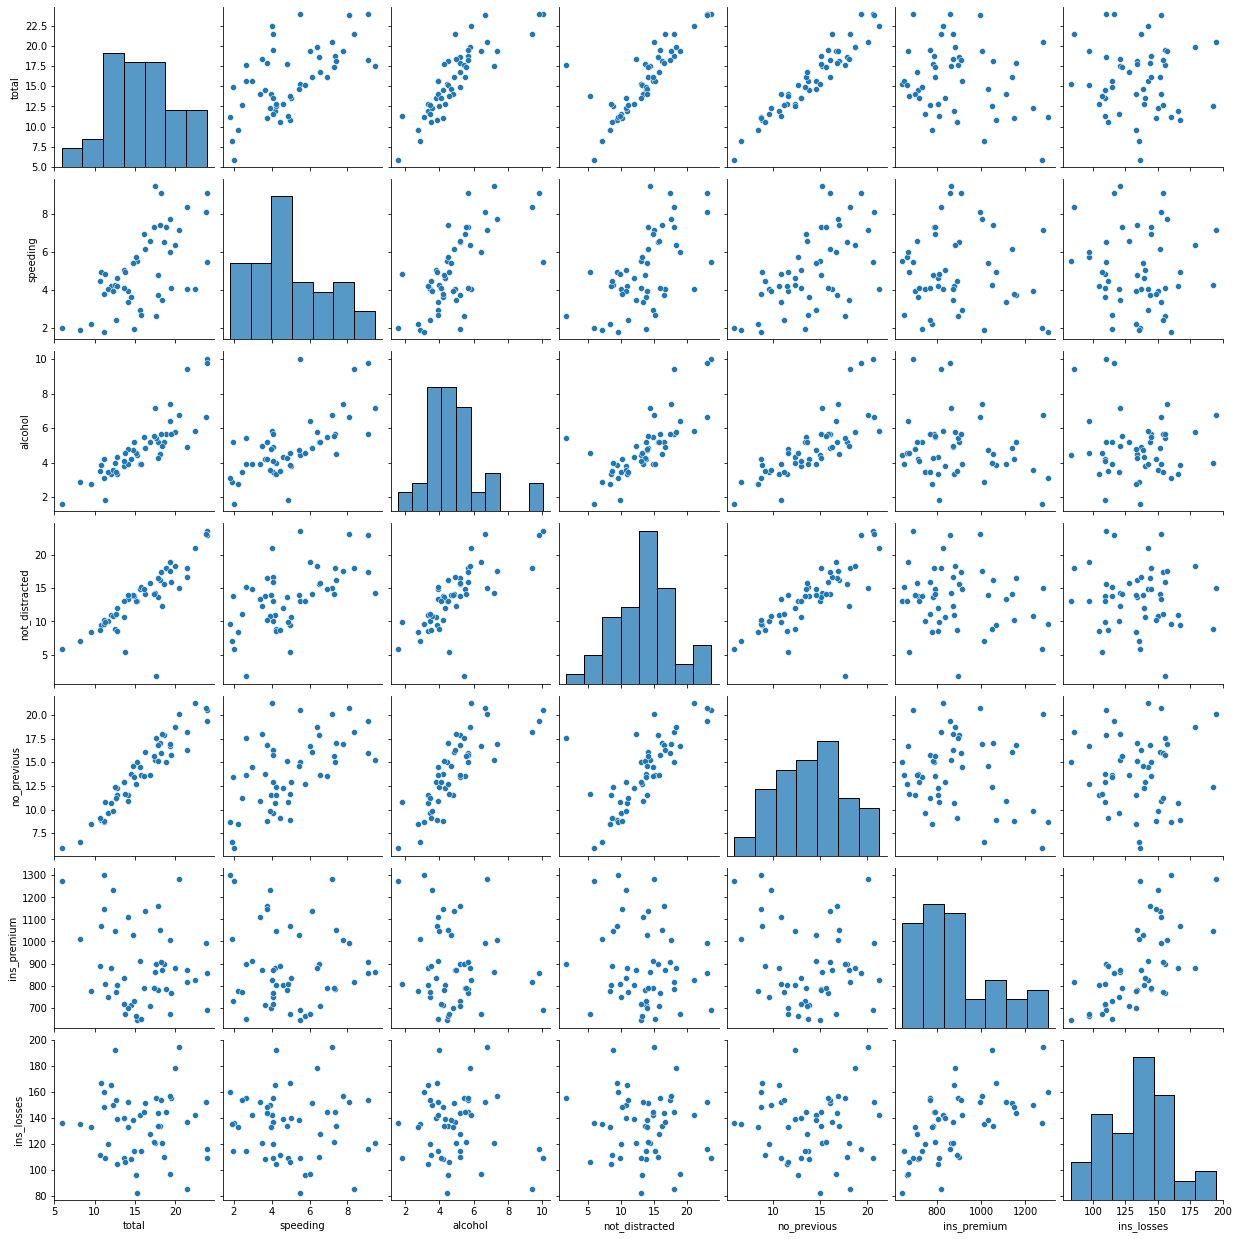

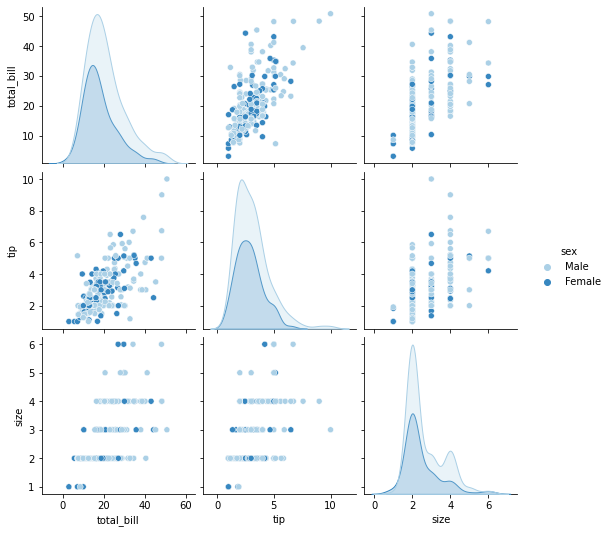

In [29]:
sns.pairplot(crash_df)


# Load another inbuilt dataset in Seaborn, tips
tips_df=sns.load_dataset('tips')

sns.pairplot(tips_df,hue ='sex',palette='Blues') # With hue you can pass in a categorical column and the charts will be colorized
                                                #  You can use color maps from Matplotlib to define what colors to use

## Rug Plot

Plots a single column of datapoints in an array as sticks on an axis.

With a rug plot you'll see a more dense number of lines where the amount is 
most common. This is like how a histogram is taller where values are more common

<AxesSubplot:xlabel='tip'>

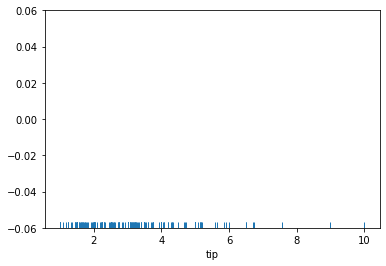

In [30]:
sns.rugplot(tips_df['tip'])

## styling

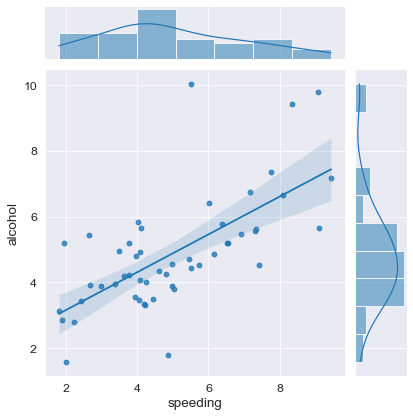

<Figure size 576x288 with 0 Axes>

In [44]:
# You can set styling for your axes and grids
sns.set_style('darkgrid') # white, whitegrid,dark
sns.jointplot(x='speeding',y='alcohol',data=crash_df,kind='reg')

# You can use figure sizing from Matplotlib
plt.figure(figsize=(8,4))

# Change size of lables, lines and other elements to best fit: (paper, talk, poster)
sns.set_context('paper', font_scale=1.4) 

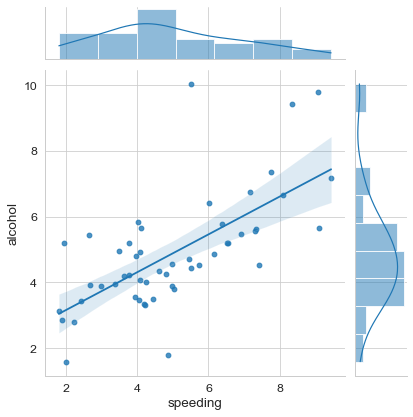

In [50]:
sns.set_style('whitegrid')
sns.jointplot(x='speeding', y='alcohol', data=crash_df, kind='reg')

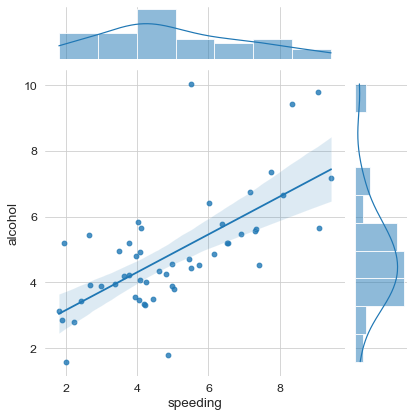

In [56]:
# Get rid of spines
# You can turn of specific spines with right=True, left=True
# bottom=True, top=True
sns.jointplot(x='speeding', y='alcohol', data=crash_df, kind='reg')
sns.despine(left=True, bottom=True)

### Categorical Plots

### Bar Plots

<AxesSubplot:xlabel='sex', ylabel='total_bill'>

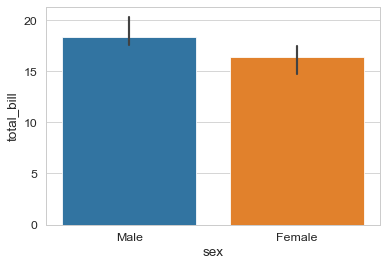

In [61]:
# Focus on distributions using categorical data in reference to one of the numerical columns

# Aggregate categorical data based on a function (mean is the default)
sns.barplot(x='sex',y='total_bill',data=tips_df, estimator=np.median) # estimator =  median, std, var, cov or make your own functions

### Count plot

<AxesSubplot:xlabel='sex', ylabel='count'>

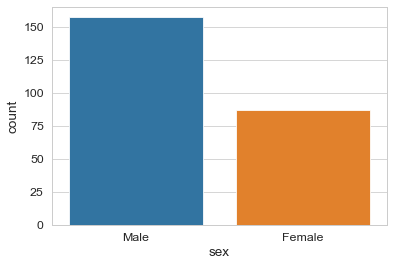

In [62]:
# A count plot is like a bar plot, but the estimator is counting the number of occurances
sns.countplot(x='sex',data=tips_df) 

### Box Plot

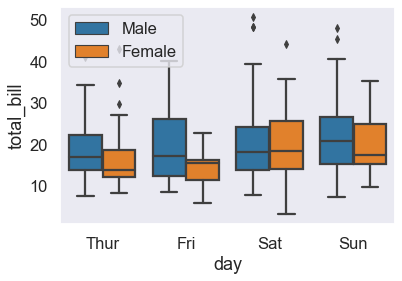

In [88]:
# A box plot allows you to compare different variables

# The box shows the quartiles of the data. The bar in the middle is the median and the box extends <1> standard deviation from the median
# The whiskers extend to all the other data aside from the points that are considered to be outliers

sns.boxplot(x='day',y='total_bill',data=tips_df, hue='sex') # Hue can add another category being sex

plt.legend(loc=0) 
# Add the optional legend with a location number (best: 0, 
# upper right: 1, upper left: 2, lower left: 3, lower right: 4,
# https://matplotlib.org/3.3.1/api/_as_gen/matplotlib.pyplot.legend.html)
# or supply a tuple of x & y from lower left

### Violin Plot

Violin Plot is a combination of the boxplot and KDE.

While a box plot corresponds to <data points>, the violin plot uses the < KDE estimation> of the data points.
    
Split allows you to compare how the categories compare to each other

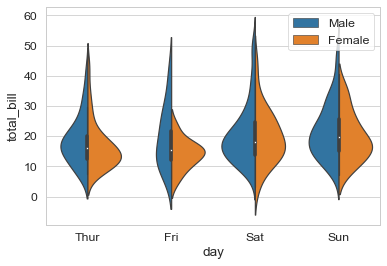

In [70]:
sns.violinplot(x='day',y='total_bill',data=tips_df, hue='sex',split=True)
plt.legend(loc=0)

### Stirp Plot

The strip plot draws a scatter plot representing all data points where one variable is categorical. 

It is often used to show all observations with a box plot that represents the average distribution.

Jitter spreads data points out so that they aren't stacked on top of each other


<AxesSubplot:xlabel='day', ylabel='total_bill'>

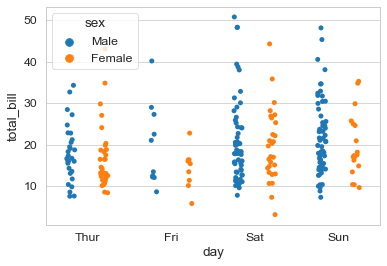

In [75]:
sns.stripplot(x='day',y='total_bill',data=tips_df, jitter=True, 
              hue='sex', dodge=True) # Hue breaks data into men and women
                                     # Dodge separates the men and women data

### swarm Plot

A swarm plot is like a strip plot, but points are adjusted so they don't overlap

It looks like a combination of the violin and strip plots

<AxesSubplot:xlabel='day', ylabel='total_bill'>

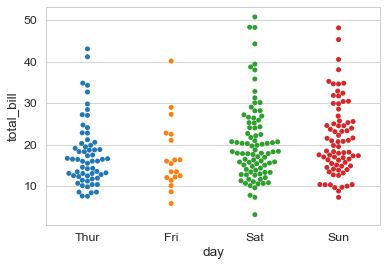

In [82]:
sns.swarmplot(x='day',y='total_bill',data=tips_df)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

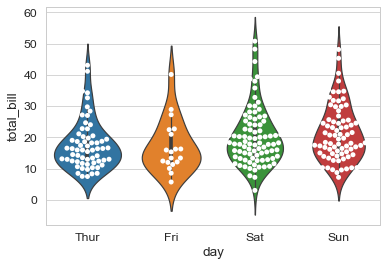

In [83]:
# You can stack a violin plot with a swarm
sns.violinplot(x='day',y='total_bill',data=tips_df)
sns.swarmplot(x='day',y='total_bill',data=tips_df, color='white')

### Plattes

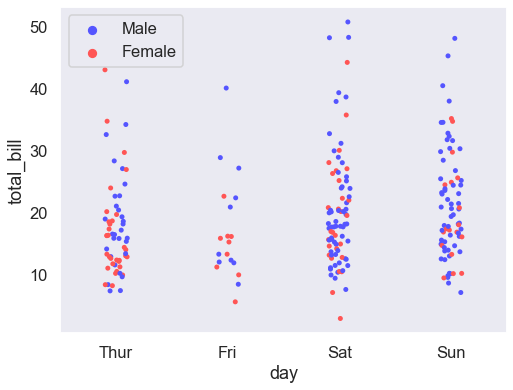

In [87]:
plt.figure(figsize=(8,6))
sns.set_style('dark')
sns.set_context('talk')

sns.stripplot(x='day',y='total_bill',data=tips_df, hue='sex', 
             palette='seismic')
# You can use Matplotlibs color maps for color styling
# https://matplotlib.org/3.3.1/tutorials/colors/colormaps.html

plt.legend(loc=0)

### Matrix Plots

### Heatmaps

<AxesSubplot:>

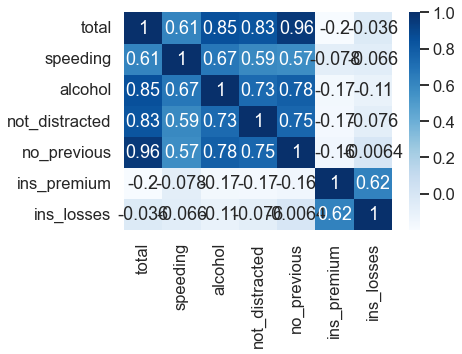

In [93]:
# To create a heatmap with data you must have data set up as a matrix where variables are on the columns and rows

# Correlation tells you how influential a variable is on the result.
# So we see that n previous accident is heavily correlated with accidents, while the insurance premium is not
crash_mx = crash_df.corr()
# Create the heatmap, add annotations and a color map
sns.heatmap(crash_mx, annot=True, cmap='Blues')

<AxesSubplot:>

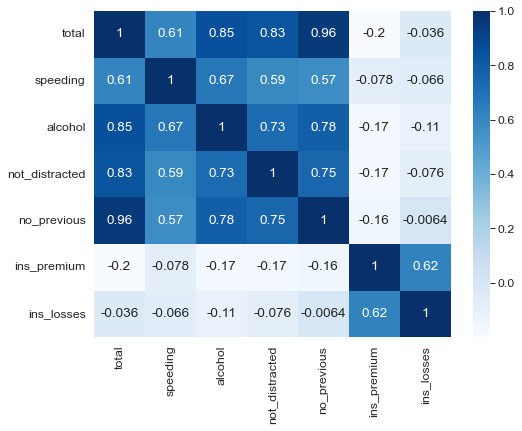

In [94]:
# the above figure is too compact
plt.figure(figsize=(8,6))
sns.set_context('paper', font_scale=1.4)
crash_mx = crash_df.corr()
sns.heatmap(crash_mx, annot=True, cmap='Blues')

### pivot table

A PivotTable is an interactive way to quickly summarize large amounts of data. You can use a PivotTable to analyze numerical data in detail, and answer unanticipated questions about your data. A PivotTable is especially designed for: Querying large amounts of data in many user-friendly ways.

In [103]:
plt.figure(figsize=(8,6))
sns.set_context('paper', font_scale=1.4)

# We can create a matrix with an index of month, columns representing years and the number of passengers for each
flights = sns.load_dataset("flights")
flights = flights.pivot_table(index='month', columns='year', values='passengers')
# We see that flights have increased over time and that most people travel in
# July and August
# You can separate data with lines
flights.head()

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472


<Figure size 576x432 with 0 Axes>

<AxesSubplot:xlabel='year', ylabel='month'>

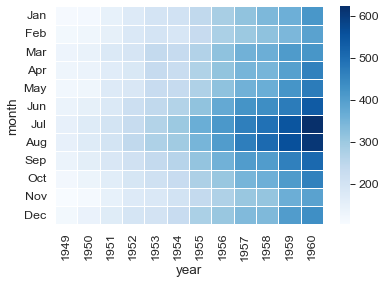

In [104]:
# use heatmap to show pivot table
sns.heatmap(flights, cmap='Blues', linecolor='white', linewidth=1)

# We see that flights have increased over time and that most people travel in July and August

### Cluster MAP

A Cluster map is a hierarchically clustered heatmap.

The distance between points is calculated, the closest are joined, and this continues for the next closest (It compares columns / rows of the heatmap).

<Figure size 576x432 with 0 Axes>

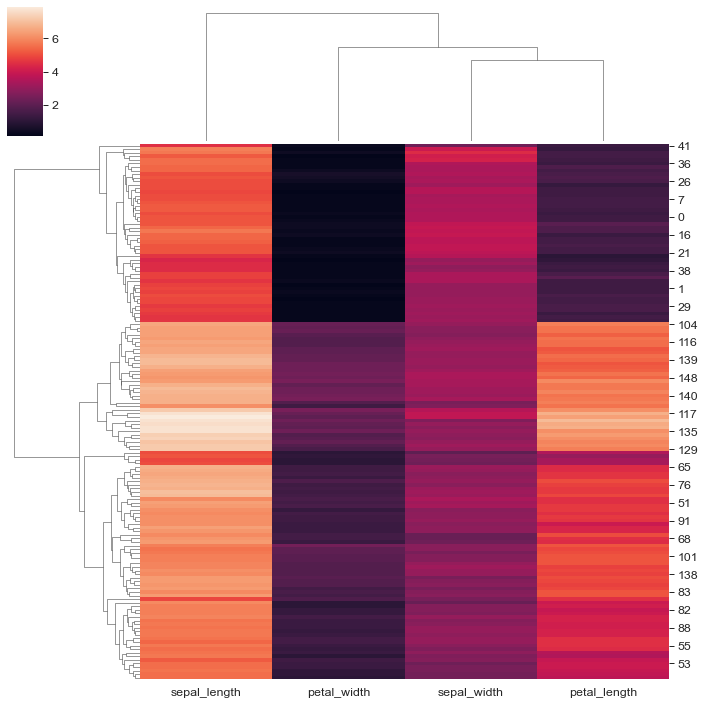

In [115]:
plt.figure(figsize=(8,6))
sns.set_context('paper', font_scale=1.4)

iris = sns.load_dataset("iris")
species = iris.pop('species')
sns.clustermap(iris)

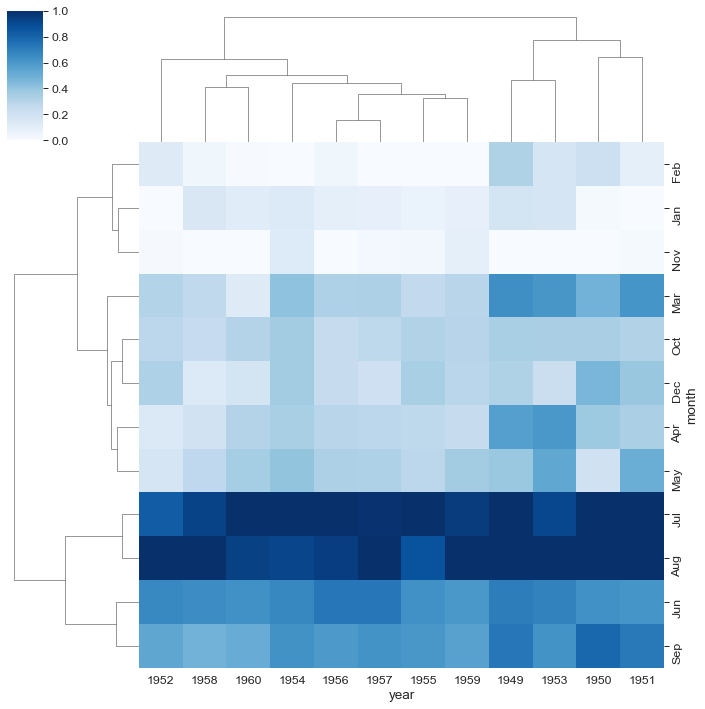

In [117]:
sns.clustermap(flights,cmap='Blues',standard_scale=1)

# With our flights data we can see that years have been reoriented to place like data closer together
# You can see clusters of data for July & August for the years 59 & 60 standard_scale normalizes the data to focus on the clustering

### PairGrid

PairGrid allows us to draw a grid of subplots using the same plot type to visualize data.

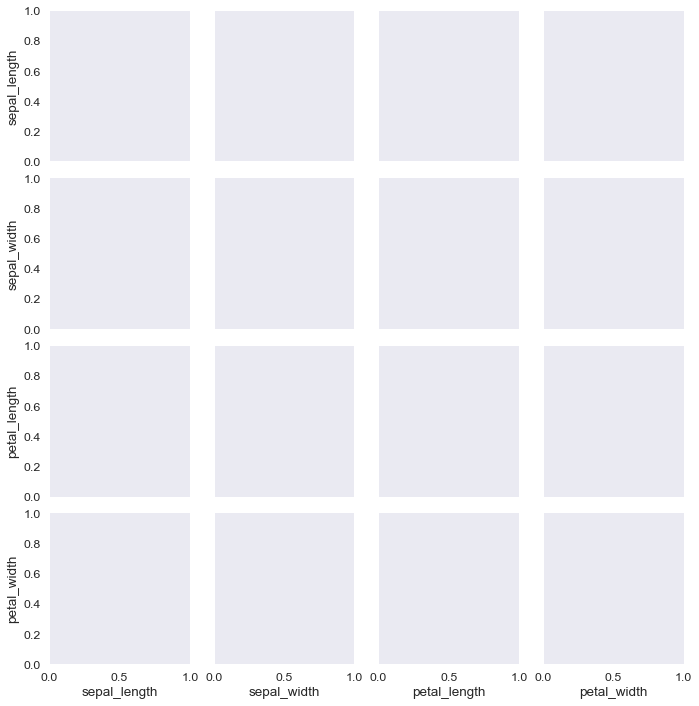

In [136]:
# Create the empty grid system using the provided data Colorize based on species
iris = sns.load_dataset('iris')
iris_g = sns.PairGrid(iris,hue='species')

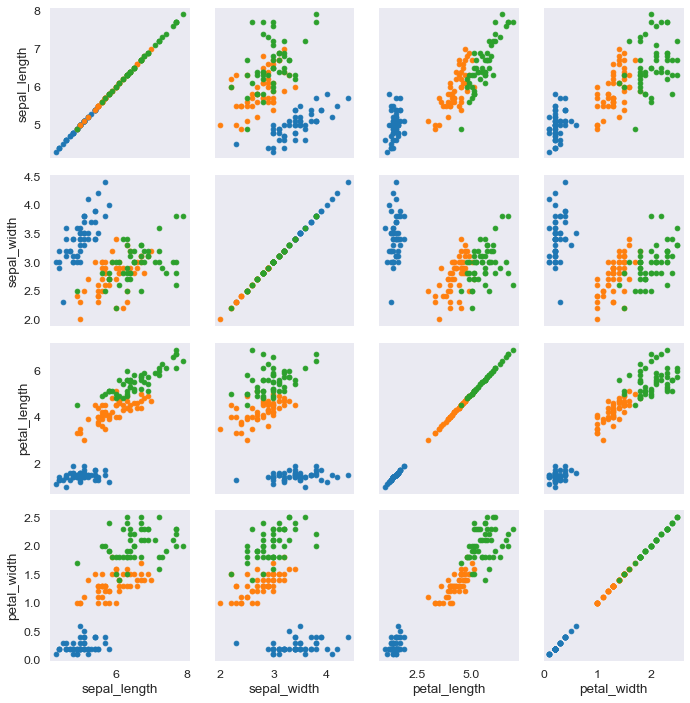

In [137]:
# Put a scatter plot across the upper, lower and diagonal
iris_g.map(plt.scatter)

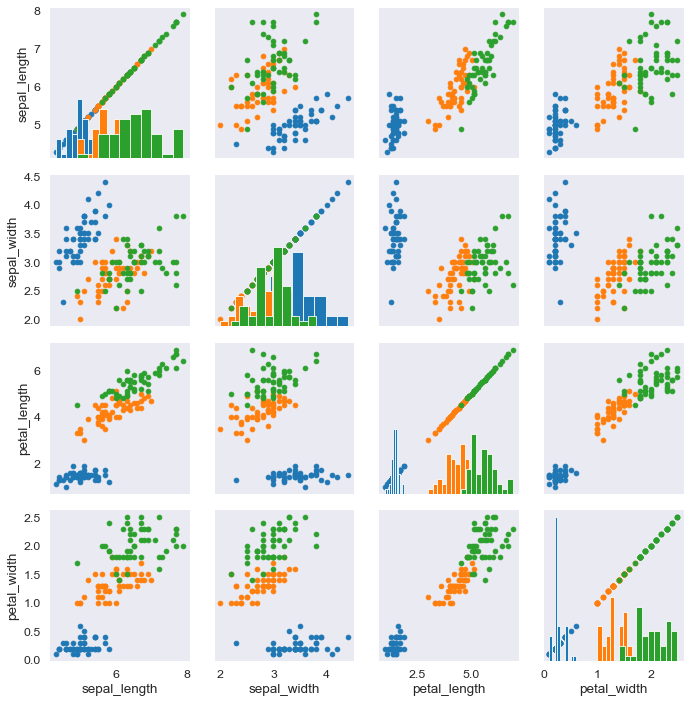

In [139]:
# Put a histogram on the diagonal 
iris_g.map_diag(plt.hist)

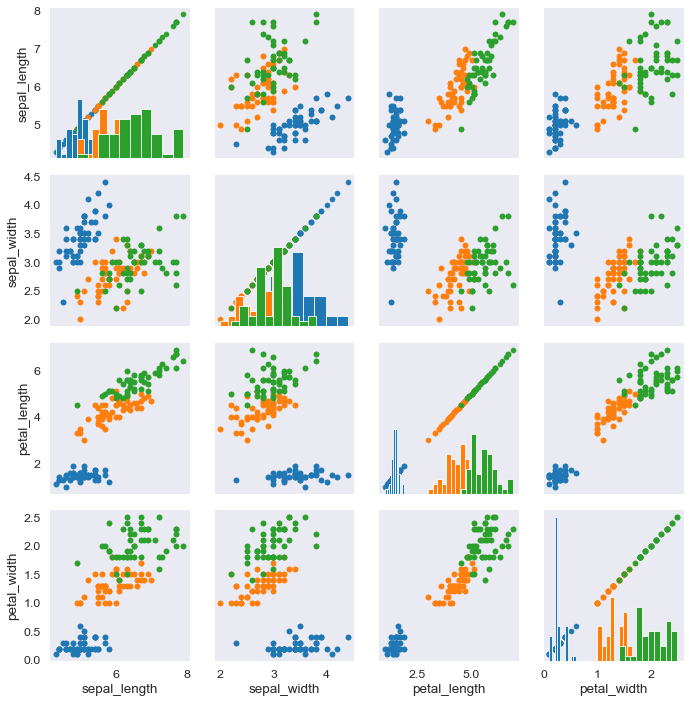

In [140]:
# And a scatter plot every place else 
iris_g.map_offdiag(plt.scatter)

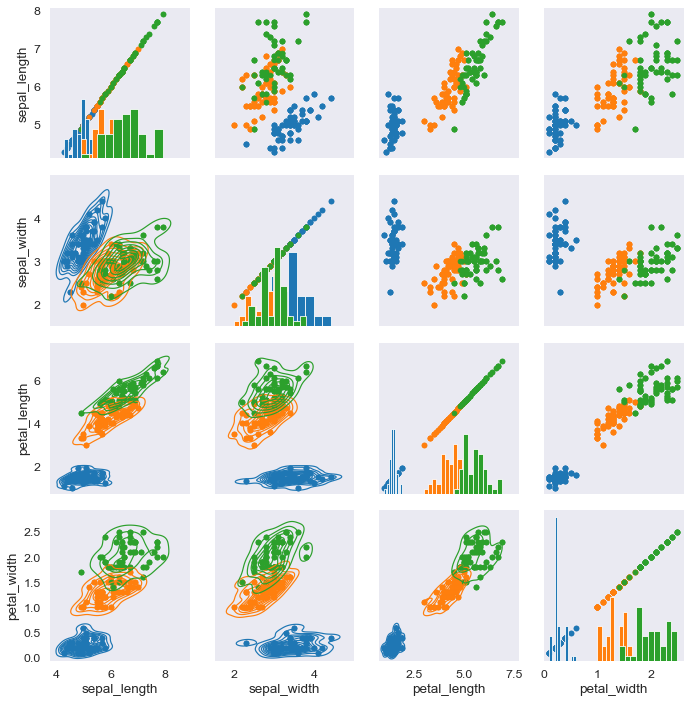

In [129]:
# Have different plots in upper, lower and diagonal
iris_g.map_upper(plt.scatter)
iris_g.map_lower(sns.kdeplot)

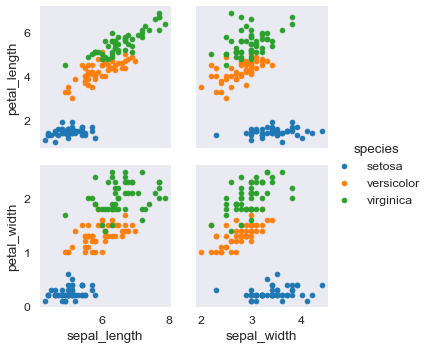

In [144]:
# You can define define variables for x & y for a custom grid
iris_g = sns.PairGrid(iris, hue="species",
                      x_vars=["sepal_length", "sepal_width"],
                      y_vars=["petal_length", "petal_width"])

iris_g.map(plt.scatter)

# Add a legend last
iris_g.add_legend()

### Facet Grid

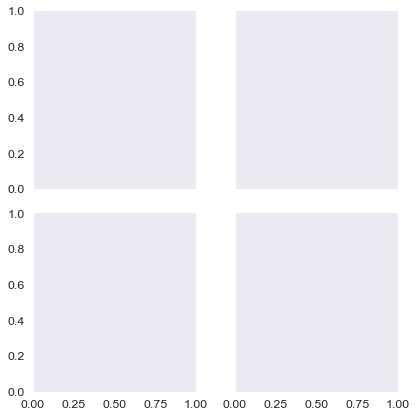

In [145]:
# Can also print multiple plots in a grid in which you define columns & rows
# Get histogram for smokers and non with total bill for lunch & dinner
tips_fg = sns.FacetGrid(tips_df, col='time', row='smoker')

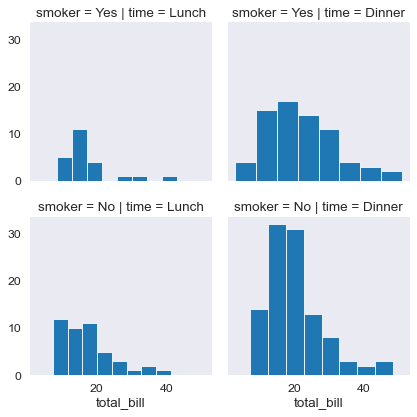

In [146]:
# You can pass in attributes for the histogram
tips_fg.map(plt.hist, "total_bill", bins=8)

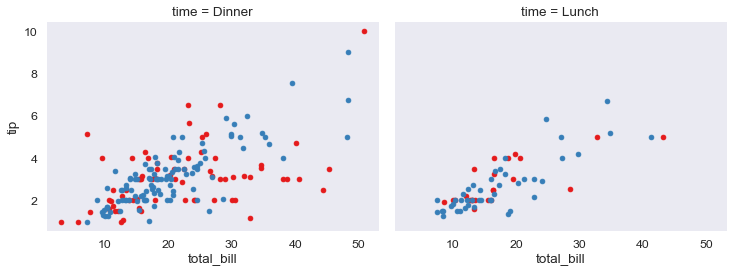

In [149]:
# Create a scatter plot with data on total bill & tip (You need to parameters)
tips_fg.map(plt.scatter, "total_bill", "tip")

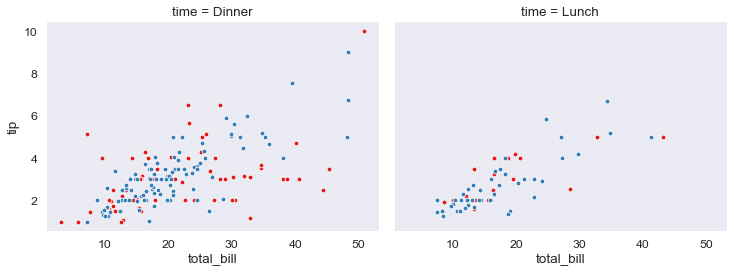

In [153]:
# We can assign variables to different colors and increase size of grid Aspect is 1.3 x the size of height
# You can change the order of the columns
# Define the palette used
tips_fg = sns.FacetGrid(tips_df, col='time', hue='smoker', height=4, aspect=1.3, #  aspect: the ratio of y-unit to x-unit.
                      col_order=['Dinner', 'Lunch'], palette='Set1')
tips_fg.map(plt.scatter, "total_bill", "tip", edgecolor='w')

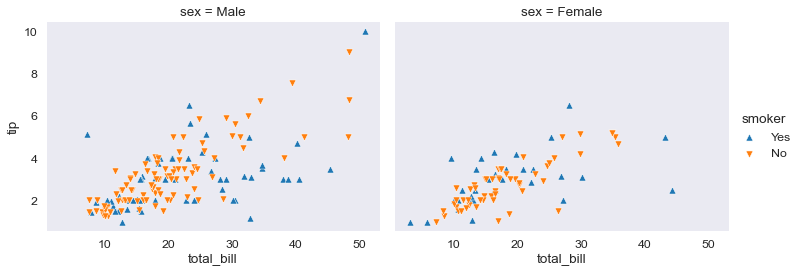

In [152]:
# # Define size, linewidth and assign a color of white to markers
kws = dict(s=50, linewidth=.5, edgecolor="w") # kws: keyword arguments

# # Define that we want to assign different markers to smokers and non
tips_fg = sns.FacetGrid(tips_df, col='sex', hue='smoker', height=4, aspect=1.3,
                         hue_order=['Yes','No'], 
                         hue_kws=dict(marker=['^', 'v']))
tips_fg.map(plt.scatter, "total_bill", "tip", **kws)
tips_fg.add_legend()

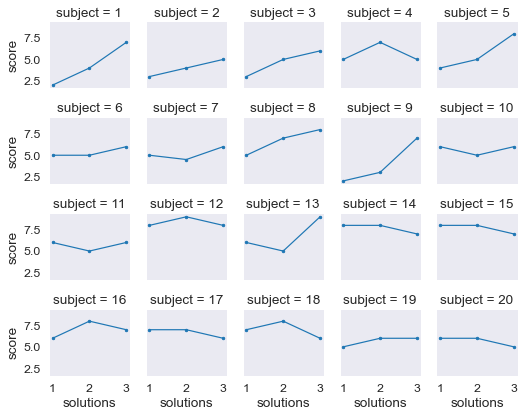

In [157]:
# This dataframe provides scores for different students based on the level
# of attention they could provide during testing
att_df = sns.load_dataset("attention")
# Put each person in their own plot with 5 per line and plot their scores
att_fg = sns.FacetGrid(att_df, col='subject', col_wrap=5, height=1.5)
att_fg.map(plt.plot, 'solutions', 'score', marker='.')

### Regression Plots

In [155]:
# lmplot combines regression plots with facet grid
tips_df = sns.load_dataset('tips')
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

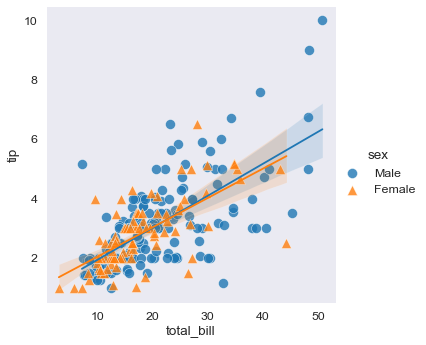

In [158]:
plt.figure(figsize=(8,6))
sns.set_context('paper', font_scale=1.4)

plt.figure(figsize=(8,6))

# We can plot a regression plot studying whether total bill effects the tip
# hue is used to show separation based off of categorical data
# We see that males tend to tip slightly more
# Define different markers for men and women
# You can effect the scatter plot by passing in a dictionary for styling of markers

sns.lmplot(x='total_bill', y='tip', hue='sex', data=tips_df, markers=['o', '^'], 
          scatter_kws={'s': 100, 'linewidth': 0.5, 'edgecolor': 'w'})

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


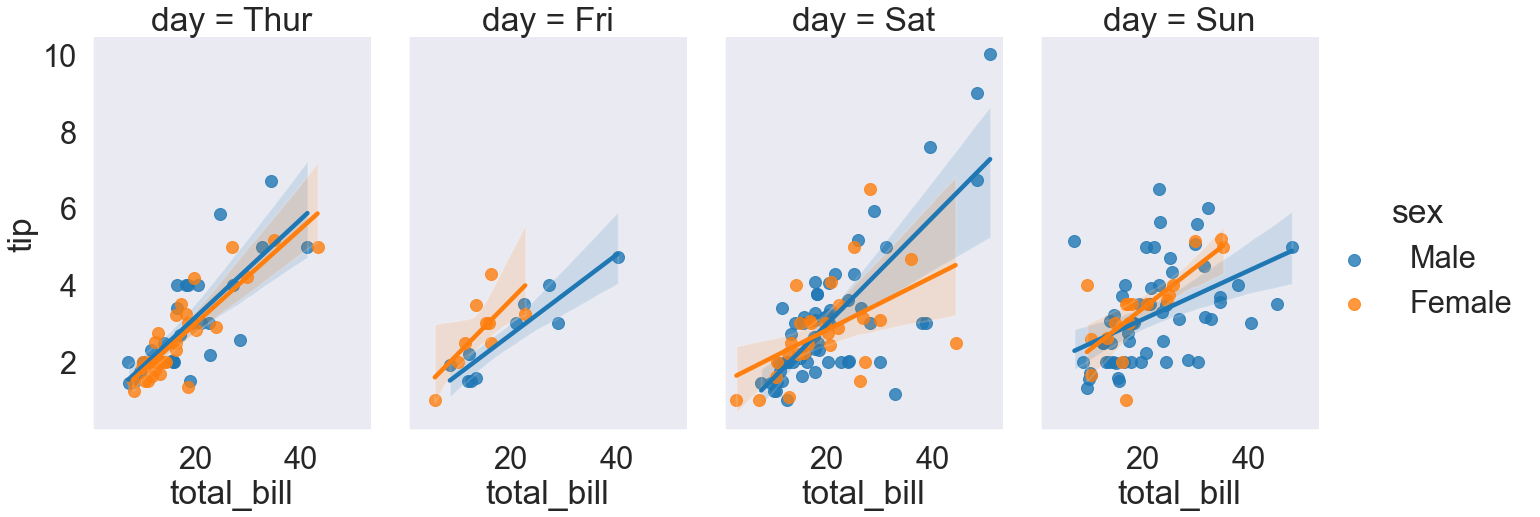

In [160]:
# You can separate the data into separate columns for day data
# sns.lmplot(x='total_bill', y='tip', col='sex', row='time', data=tips_df)
print(tips_df.head())

# Makes the fonts more readable
sns.set_context('poster', font_scale=1.4)

sns.lmplot(x='total_bill', y='tip', data=tips_df, col='day', hue='sex',
          height=8, aspect=0.6)